After achieving rather nice training,validation and testing accuracies in my networks, i'm having the sinking feeling that my manually annotated data is actually shit. This notebook is going to re-check my annotations.

In [1]:
from keras import models
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000
import numpy as np 
import pandas as pd
import os 
import soundfile as sf

Using TensorFlow backend.


In [2]:
# load audio snippets and calculate features 
labs = pd.read_csv('audio_labels_cleaned.csv')
date_2_folder_paths = {
        '2018-08-16' : os.path.join('audio', '2018-08-16/'),
        '2018-08-18' : os.path.join('audio', '2018-08-18/'),
        '2018-08-19' : os.path.join('audio', '2018-08-19', 'ch1/',)
                        }
path_to_datafolder = os.path.join('/media', 'tbeleyur', 'THEJASVI_DATA_BACKUP_3',
                                  'fieldwork_2018_002', 'horseshoe_bat',
                                  )
all_classes = []
all_audio = []
fs = 250000
for i, row in labs.iterrows():
    t_start, t_stop = row['time_start'], row['time_end']
    file_name = os.path.join(path_to_datafolder, 
                             date_2_folder_paths[row['date_recorded']],
                             row['file_name'])
    ch_num = int(row['channel_num'])
    snippet, _ = sf.read(file_name, start=int(t_start*fs), 
                                     stop=int(t_stop*fs))
    num_samples = 50000
    input_snippet = snippet[:,ch_num][:num_samples]
    all_audio.append(input_snippet)
    all_classes.append(str(labs.loc[i,'class_name']))


In [3]:
i = 0

In [4]:
% matplotlib notebook

In [5]:
i=33

In [118]:
labs.shape

(309, 14)

In [132]:
i = 300

<IPython.core.display.Javascript object>


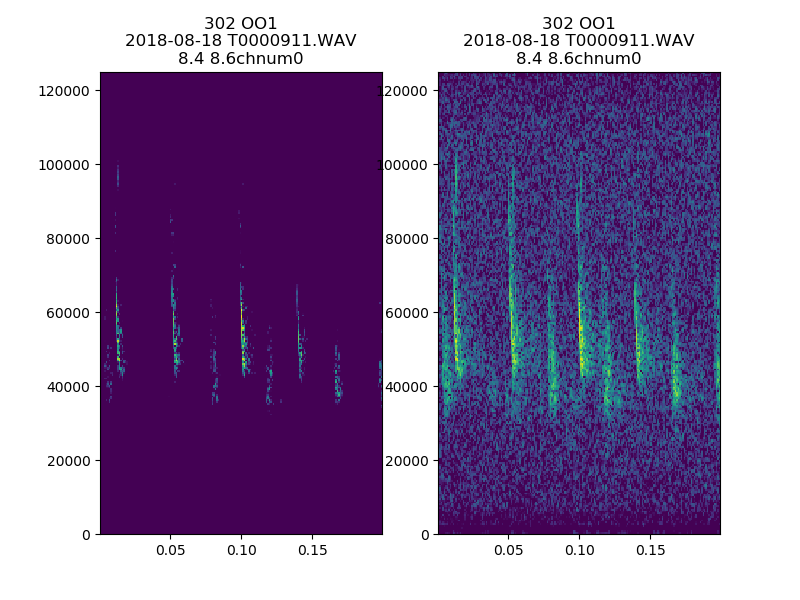

In [133]:
plt.figure(figsize=(8,6))
plt.subplot(121)
vmin = 20*np.log10(np.max(all_audio[i])) - 60  # hide anything below -60 dBc, thanks https://tinyurl.com/yc4tuvup
plt.specgram(all_audio[i], Fs=250000, NFFT=512, noverlap=256, vmin=vmin,
            cmap='viridis')
text1 = str(i+2)+' ' + all_classes[i] + '\n'  +labs.loc[i,'date_recorded']+ ' '+labs.loc[i,'file_name'] 
text2 = '\n' + str(labs.loc[i,'time_start'])+' '+ str(labs.loc[i,'time_end']) + 'chnum' + str(labs.loc[i,'channel_num']) 
plt.title(text1+text2)
plt.subplot(122)
vmin = 20*np.log10(np.max(all_audio[i])) - 80  # hide anything below -60 dBc, thanks https://tinyurl.com/yc4tuvup
plt.specgram(all_audio[i], Fs=250000, NFFT=512, noverlap=256, vmin=vmin,
            cmap='viridis')
text1 = str(i+2)+' ' + all_classes[i] + '\n'  +labs.loc[i,'date_recorded']+ ' '+labs.loc[i,'file_name'] 
text2 = '\n' + str(labs.loc[i,'time_start'])+' '+ str(labs.loc[i,'time_end']) + 'chnum' + str(labs.loc[i,'channel_num']) 
plt.title(text1+text2)
i += 1 